In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df3 = pd.read_feather('export_UIUC_feather', columns=None, use_threads=True)
df3 = df3.drop(['index'], axis = 1)

df4 = pd.read_feather('export_Urbana_feather', columns=None, use_threads=True)
df5 = pd.read_feather('export_UrbanaOnHolmes_feather', columns=None, use_threads=True)
df6 = pd.read_feather('export_WarnowChacko_feather', columns=None, use_threads=True)


In [8]:
df3.rename(columns={'reading_datestamp': 'new_date'}, inplace = True)
df3.head(5)

,new_date,co_prescaled,CO2_prescaled,no_prescaled,no2_prescaled,o3_prescaled,pm1_prescale,pm2_5_prescale,pm4_prescale,pm10_prescale,pm_total_prescale,pm_tpc_prescale,nox_prescaled,temperature_f,pressure,humidity
0,2021-09-02 04:45:00,250.38,420.35,15.87,6.86,14.86,5.38,6.94,8.00,10.23,10.23,2.91,13.14,75.9,992.6,63.6
1,2021-09-02 05:00:00,255.19,418.04,15.78,7.10,16.61,5.26,6.89,7.97,9.76,9.76,2.82,12.58,77.0,992.5,62.5
2,2021-09-02 05:15:00,254.69,413.88,15.90,7.30,18.42,5.35,6.98,8.12,11.68,11.70,2.88,14.58,77.7,993.0,61.5
3,2021-09-02 05:30:00,265.17,412.49,15.54,7.48,20.59,5.20,6.77,7.84,9.82,9.82,2.78,12.60,78.4,992.3,61.0
4,2021-09-02 05:45:00,256.95,408.79,17.10,6.56,23.36,5.40,6.97,8.12,10.32,10.32,2.92,13.24,79.2,992.9,59.8


In [9]:
temp_df = pd.concat([df4, df5, df6], axis = 0)
temp_df.head(5)

,new_date,PM1.0 (CF=1) ug/m3,PM2.5 (CF=1) ug/m3,PM10.0 (CF=1) ug/m3,UptimeMinutes,ADC,Temperature_F,Humidity_%,PM2.5 (CF=ATM) ug/m3
0,2021-08-23 19:00:00,12.49250,16.487500,17.147500,5712.0,-58.250000,93.500000,44.500000,16.487500
1,2021-08-23 19:15:00,12.80250,16.617500,17.025000,5724.0,-58.750000,93.000000,43.750000,16.617500
2,2021-08-23 19:30:00,13.46000,17.500000,18.172857,5739.0,-59.571429,92.142857,45.142857,17.500000
3,2021-08-23 19:45:00,14.12375,18.346250,18.908750,5754.0,-58.625000,91.375000,46.500000,18.346250
4,2021-08-23 20:00:00,14.75000,19.221429,19.768571,5769.0,-57.428571,90.714286,50.000000,19.221429


In [10]:
final_df = df3.merge(temp_df, on='new_date')
final_df.head(5)

,new_date,co_prescaled,CO2_prescaled,no_prescaled,no2_prescaled,o3_prescaled,pm1_prescale,pm2_5_prescale,pm4_prescale,pm10_prescale,...,pressure,humidity,PM1.0 (CF=1) ug/m3,PM2.5 (CF=1) ug/m3,PM10.0 (CF=1) ug/m3,UptimeMinutes,ADC,Temperature_F,Humidity_%,PM2.5 (CF=ATM) ug/m3
0,2021-09-02 04:45:00,250.38,420.35,15.87,6.86,14.86,5.38,6.94,8.00,10.23,...,992.6,63.6,5.431250,7.600000,8.127500,19254.0,-55.625000,68.0,61.000000,7.600000
1,2021-09-02 04:45:00,250.38,420.35,15.87,6.86,14.86,5.38,6.94,8.00,10.23,...,992.6,63.6,5.431250,7.600000,8.127500,19254.0,-55.625000,68.0,61.000000,7.600000
2,2021-09-02 05:00:00,255.19,418.04,15.78,7.10,16.61,5.26,6.89,7.97,9.76,...,992.5,62.5,5.922857,8.282857,8.828571,19269.0,-57.142857,68.0,61.285714,8.282857
3,2021-09-02 05:00:00,255.19,418.04,15.78,7.10,16.61,5.26,6.89,7.97,9.76,...,992.5,62.5,5.922857,8.282857,8.828571,19269.0,-57.142857,68.0,61.285714,8.282857
4,2021-09-02 05:15:00,254.69,413.88,15.90,7.30,18.42,5.35,6.98,8.12,11.68,...,993.0,61.5,6.103750,8.436250,9.050000,19284.0,-56.750000,68.0,62.000000,8.436250


<AxesSubplot:>

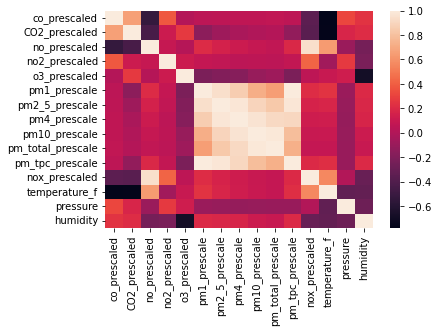

In [11]:
#Correlation heatmap for UIUC Sensor Data
sns.heatmap(df3.corr())

<AxesSubplot:>

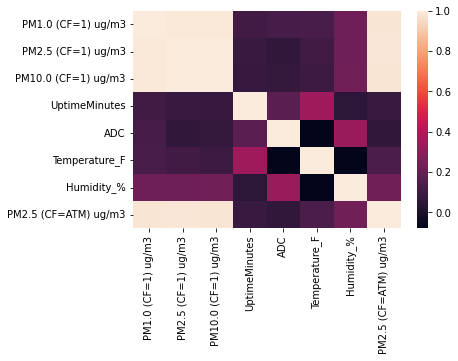

In [51]:
#Correlation heatmap for all Purple Air data
sns.heatmap(temp_df.corr())

<AxesSubplot:>

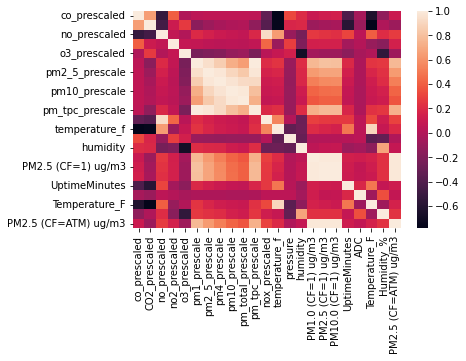

In [50]:
#Correlation heatmap for combined sensor data
sns.heatmap(final_df.corr())

In [30]:
a = final_df.corr()['PM2.5 (CF=1) ug/m3'].sort_values()

In [34]:
b = a.to_frame()

<AxesSubplot:>

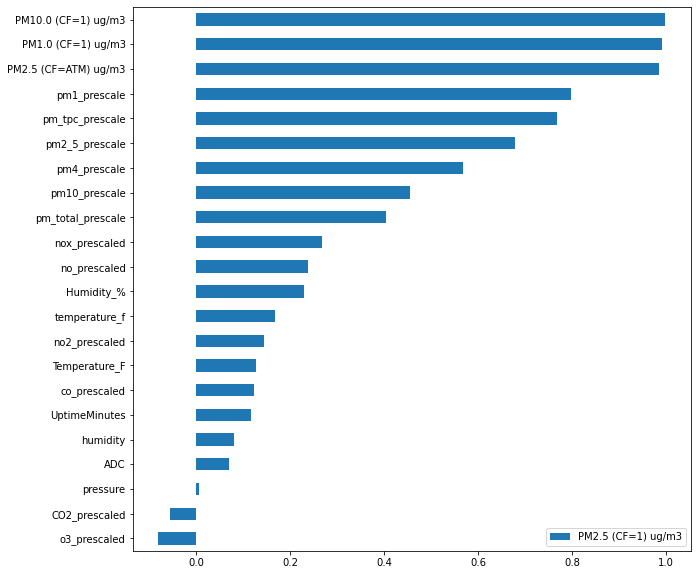

In [38]:
#Correlation of PM2.5 values from Purple air to other recorded variables
fig, ax = plt.subplots(figsize=(10,10))
b.drop('PM2.5 (CF=1) ug/m3').plot.barh(ax=ax)

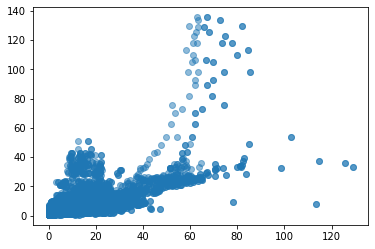

In [25]:
#Scatter plot showing correlation between purple air PC 2.5 values and UIUC sensor PM 2.5 values
plt.scatter(final_df['PM2.5 (CF=1) ug/m3'], final_df['pm2_5_prescale'], alpha = 0.5)


In [43]:
#Covariance Matrix
np.cov(final_df['PM2.5 (CF=1) ug/m3'], final_df['pm2_5_prescale'])

array([[108.90415408,          nan],
       [         nan,          nan]])

array([<AxesSubplot:xlabel='new_date'>, <AxesSubplot:xlabel='new_date'>],
      dtype=object)

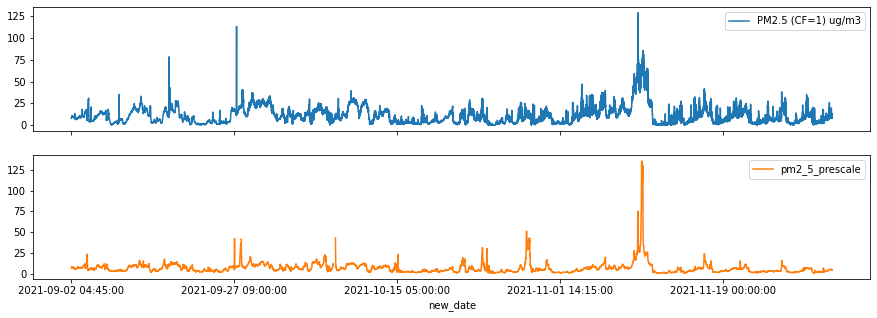

In [32]:
#Variation of PM 2.5 Values from Purple air and UIUC sensor over time
new_df = final_df.set_index('new_date')
new_df[['PM2.5 (CF=1) ug/m3', 'pm2_5_prescale']].plot(subplots = True, figsize = (15,5), legend = True)

Text(0, 0.5, 'PC 2.5')

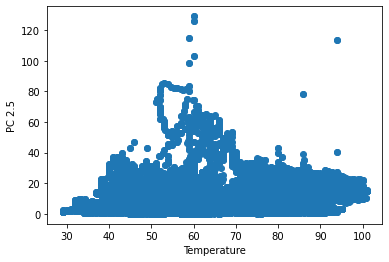

In [30]:
#Test plot showing variation of PC 2.5 with Temperature
plt.scatter(final_df['Temperature_F'], final_df['PM2.5 (CF=1) ug/m3'])
plt.xlabel('Temperature')
plt.ylabel('PC 2.5')

Text(0, 0.5, 'PC 2.5')

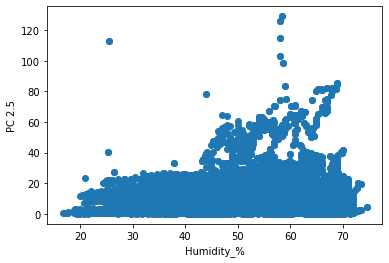

In [33]:
#Scatter plot showing variation of PC2.5 with Humidity
plt.scatter(final_df['Humidity_%'], final_df['PM2.5 (CF=1) ug/m3'])
plt.xlabel('Humidity_%')
plt.ylabel('PC 2.5')